# Project: Wrangling and Analyze Data

In [90]:
## import packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests as rq
import tweepy
import seaborn as sns
from bs4 import BeautifulSoup as bs
import calendar


%matplotlib inline

## Data Gathering

1. Directly downloaded the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# read archive
df_twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
#confirm dataset
df_twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# data url
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

In [5]:
# get response from the URL
response = rq.get(url)

In [6]:
# write content to tsv file
with open("image_predictions.tsv", "wb") as file:
    file.write(response.content)

In [104]:
# read image predicition 
df_image_pred = pd.read_csv("image_predictions.tsv", sep = "\t")

In [105]:
# confirm data
df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [9]:
# authenticating twitter api credentials
consumer_key = 'xxx'
consumer_secret = 'xxx'
access_token = 'xxx'
access_token_secret = 'xxx'

In [10]:
# instantiating the api
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [11]:
# creating API object
api = tweepy.API(auth)

In [12]:
# list tweet ids for the query 
tweet_ids = list(df_twitter_archive['tweet_id'])

In [13]:
# create the tweet_json file 
with open('tweet_json.txt', 'w') as file:
    file.write("tweet_id" + "\t" + "retweet_count" + "\t" + "favorite_count" + "\n")

In [14]:
# loop through the tweet id and get the retweet and favorite count
for id in tweet_ids:
    try:
        status = api.get_status(id)
        retweet_count = str(status.retweet_count)
        favorite_count = str(status.favorite_count)
        with open('tweet_json.txt', 'a') as file:
            file.write( str(id) + "\t" + retweet_count + "\t" + favorite_count + "\n")
    except:
        continue;

In [15]:
# load tweet stats (retweet and favorite count)
df_tweet_stat = pd.read_csv('tweet_json.txt', sep = '\t')

In [16]:
# confirm data 
df_tweet_stat.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7019,33851
1,892177421306343426,5303,29359
2,891815181378084864,3486,22079
3,891689557279858688,7232,36973
4,891327558926688256,7773,35347


## Assessing Data
Assessing collected dataset



##### Visual assessment:

In [17]:
df_twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2075,670840546554966016,NaN,NaN,2015-11-29 05:43:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Colby. He's that one cool friend that get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670840546...,10,10,Colby,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1887,674788554665512960,NaN,NaN,2015-12-10 03:11:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Maggie. She's a Western Septic Do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674788554...,9,10,Maggie,None,None,None,None
1258,710283270106132480,NaN,NaN,2016-03-17 01:55:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gunner. He's a Figamus Newton. King of...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710283270...,11,10,Gunner,None,None,None,None
2320,666437273139982337,NaN,NaN,2015-11-17 02:06:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see a lone northeastern Cumberbatch. H...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666437273...,7,10,None,None,None,None,None
820,770414278348247044,NaN,NaN,2016-08-30 00:14:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Al Cabone. He's a gangsta puppa. Rather h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770414278...,11,10,Al,None,None,None,None
883,760252756032651264,NaN,NaN,2016-08-01 23:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fido. He can tell the weather. Not goo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760252756...,4,10,Fido,None,None,None,None
1416,698635131305795584,NaN,NaN,2016-02-13 22:29:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we are witnessing five Guatemalan Birch F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698635131...,12,10,None,None,None,None,None
905,758099635764359168,NaN,NaN,2016-07-27 00:40:12 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",In case you haven't seen the most dramatic sne...,NaN,NaN,NaN,https://vine.co/v/hQJbaj1VpIz,13,10,None,None,None,None,None
1677,682059653698686977,NaN,NaN,2015-12-30 04:44:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tess. Her main passions are shelves an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682059653...,11,10,Tess,None,None,None,None


In [18]:
df_image_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1806,832369877331693569,https://pbs.twimg.com/media/C40r_GDWAAA5vNJ.jpg,1,kelpie,0.504690,True,German_short-haired_pointer,0.105208,True,Staffordshire_bullterrier,0.054338,True
777,689835978131935233,https://pbs.twimg.com/media/CZLKJpDWQAA-5u4.jpg,1,collie,0.600186,True,Shetland_sheepdog,0.298939,True,borzoi,0.022616,True
389,673359818736984064,https://pbs.twimg.com/media/CVhBLohWEAAXtYl.jpg,1,English_setter,0.696568,True,Brittany_spaniel,0.104046,True,Ibizan_hound,0.034832,True
665,682750546109968385,https://pbs.twimg.com/media/CXmd_bsWkAEEXck.jpg,1,English_setter,0.947198,True,English_springer,0.031128,True,Brittany_spaniel,0.005512,True
1306,753398408988139520,https://pbs.twimg.com/ext_tw_video_thumb/75339...,1,whippet,0.163794,True,Italian_greyhound,0.157192,True,English_foxhound,0.142995,True
355,672594978741354496,https://pbs.twimg.com/media/CVWJkJXWsAInlZl.jpg,1,Great_Pyrenees,0.755945,True,Old_English_sheepdog,0.082337,True,Afghan_hound,0.027037,True
437,674416750885273600,https://pbs.twimg.com/media/CVwCdCFW4AUHY4D.jpg,1,Chihuahua,0.287201,True,Boston_bull,0.250920,True,whippet,0.141012,True
878,698355670425473025,https://pbs.twimg.com/media/CbEOxQXW0AEIYBu.jpg,1,pug,0.990191,True,Pekinese,0.002799,True,sunglasses,0.001310,False
746,687664829264453632,https://pbs.twimg.com/media/CYsTg1XUsAEPjxE.jpg,1,pug,0.957365,True,French_bulldog,0.038559,True,toy_poodle,0.000667,True
330,672095186491711488,https://pbs.twimg.com/media/CVPDAR9XIAAm8QB.jpg,1,pug,0.794087,True,French_bulldog,0.140796,True,bull_mastiff,0.044681,True


In [19]:
df_tweet_stat.sample(10)

,tweet_id,retweet_count,favorite_count
307,834086379323871233,2045,12273
201,851591660324737024,3134,14987
926,751583847268179968,1006,4104
1641,682303737705140231,889,2829
1068,736010884653420544,2713,7271
412,820837357901512704,6253,0
641,790987426131050500,1993,9321
1331,703079050210877440,2811,6838
315,832769181346996225,38,0
2244,667437278097252352,199,396


##### Programmatic assessment:

In [20]:
#checking tweet_stat table for quality issues 
df_tweet_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2323 entries, 0 to 2322
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2323 non-null   int64
 1   retweet_count   2323 non-null   int64
 2   favorite_count  2323 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [21]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [23]:
# check source column values pattern
df_twitter_archive.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [24]:
# check expanded column values pattern
df_twitter_archive.expanded_urls.unique()

array(['https://twitter.com/dog_rates/status/892420643555336193/photo/1',
       'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
       'https://twitter.com/dog_rates/status/891815181378084864/photo/1',
       ...,
       'https://twitter.com/dog_rates/status/666033412701032449/photo/1',
       'https://twitter.com/dog_rates/status/666029285002620928/photo/1',
       'https://twitter.com/dog_rates/status/666020888022790149/photo/1'],
      dtype=object)

In [25]:
# check values in rating denominator
df_twitter_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [26]:
# check values in rating numerator
df_twitter_archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [27]:
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [28]:
df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [29]:
# check names in archive
df_twitter_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [30]:
df_twitter_archive.doggo.unique()

array(['None', 'doggo'], dtype=object)

In [31]:
df_twitter_archive.floofer.unique()

array(['None', 'floofer'], dtype=object)

In [32]:
df_twitter_archive.pupper.unique()

array(['None', 'pupper'], dtype=object)

In [33]:
df_twitter_archive.puppo.unique()

array(['None', 'puppo'], dtype=object)

-----------------------------------------------------------------------------------

### Quality issues
##### `twitter_archive` table
1. rating_denominator is 0 for some records
2. rating_denominator is less than 10 for some records 
3. invalid names (none, such, a, not, just, my, all, old, the, by)
4. Erroneous datatypes (timestamp, in_reply_to_status_id,in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
5. missing records in in_reply_to_status_id (78 instead of 2356)
6. missing records in in_reply_to_user_id (78 instead of 2356)
7. missing records in retweeted_status_id (181 instead of 2356)
8. missing records in retweeted_status_timestamp (181 instead of 2356)
9. missing records in expanded_urls (2297 instead of 2356)
10. None values in doggo', 'floofer', 'pupper' and 'puppo' columns


##### `image_pred` table
11. p1_conf, p2_conf and p3_conf records should be in percentage
12. prediction contains underscore characters


### Tidiness issues
1. text column in `twitter_archive` table should be splitted into about and link, removing rating
2. source column in `twitter_archive` table should be as source link and source title not combined in source column
3. inadequate descriptive column names in `image_pred` table.
4. `tweet_stat` table should be merged into `twitter_archive` table to make the records unified for analysis 

## Cleaning Data

In [34]:
# Make copies of original pieces of data
df_image_pred_clean = df_image_pred.copy()
df_twitter_archive_clean = df_twitter_archive.copy()
df_tweet_stat_clean = df_tweet_stat.copy()

### Issue: 
Rating denominator have records less than 10 and some denominators are 0

#### Define:

- Add 10 to all the rating denominator with values less than 10.

#### Code

In [35]:
# Increase all rating_denominator less than 10 by 10
for ind in df_twitter_archive_clean.index:
    if df_twitter_archive_clean['rating_denominator'][ind] < 10:
        df_twitter_archive_clean['rating_denominator'][ind] = df_twitter_archive_clean['rating_denominator'][ind] + 10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#### Test

In [36]:
#confirm all the are equal or above 10
df_twitter_archive_clean.rating_denominator.unique()

array([ 10,  15,  70,  17,  11, 150, 170,  20,  50,  90,  80,  40, 130,
       110,  16, 120,  12], dtype=int64)

### Issue:
invalid entries names (none, such, a, not, just, my, all, old, the, by)

#### Define

- Replace all rows having any following (none, such, a, not, just, my, all, old, the, by) as name with empty strings using the string replace function 

#### Code

In [37]:
# remove wrong names from the name columns
wrong_name = ['none', 'such', 'a', 'not', 'just', 'my', 'all', 'old', 'the', 'by']
df_twitter_archive_clean.name.replace(wrong_name, "", inplace = True)

#### Test

In [38]:
# check that the wrong names are removed
for name in wrong_name:
    assert name not in df_twitter_archive_clean.name.values

### Issue:
Erroneous datatypes (timestamp, in_reply_to_status_id,in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

#### Define

- convert timestamp and retweeted_status_timestamp from string format to Datetime.
- convert in_reply_to_status_id,in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id from float format to int

#### Code

In [39]:
# convert timestamp and retweeted_status_timestamp from string format to Datetime.
df_twitter_archive_clean['timestamp'] = pd.to_datetime(df_twitter_archive_clean['timestamp'])
df_twitter_archive_clean['retweeted_status_timestamp'] = pd.to_datetime(df_twitter_archive_clean['retweeted_status_timestamp'])

In [40]:
# convert in_reply_to_status_id,in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id from float format to int

#fill NA with 0 so as to convert to int

df_twitter_archive_clean['in_reply_to_status_id']  = df_twitter_archive_clean['in_reply_to_status_id'].fillna(0)
df_twitter_archive_clean['in_reply_to_status_id']  = df_twitter_archive_clean['in_reply_to_status_id'].astype(int)


df_twitter_archive_clean['in_reply_to_user_id']  = df_twitter_archive_clean['in_reply_to_user_id'].fillna(0)
df_twitter_archive_clean['in_reply_to_user_id']  = df_twitter_archive_clean['in_reply_to_user_id'].astype(int)

df_twitter_archive_clean['retweeted_status_id']  = df_twitter_archive_clean['retweeted_status_id'].fillna(0)
df_twitter_archive_clean['retweeted_status_id']  = df_twitter_archive_clean['retweeted_status_id'].astype(int)

df_twitter_archive_clean['retweeted_status_user_id']  = df_twitter_archive_clean['retweeted_status_user_id'].fillna(0)
df_twitter_archive_clean['retweeted_status_user_id']  = df_twitter_archive_clean['retweeted_status_user_id'].astype(int)

#### Test

In [41]:
# check for data type
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       2356 non-null   int32              
 2   in_reply_to_user_id         2356 non-null   int32              
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         2356 non-null   int32              
 7   retweeted_status_user_id    2356 non-null   int32              
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue:
missing records in columns

#### Define
- Drop the following columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_timestamp columns using the pandas drop function.
- Drop doggo', 'floofer', 'pupper' and 'puppo' columns as values as None and would not be needed for this analysis questions

#### Code

In [42]:
# drop columns not needed for our analysis
df_twitter_archive_clean = df_twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo' ,'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_timestamp','retweeted_status_user_id'], axis = 1)

#### Test

In [43]:
# check columns to confirm drop
df_twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name'],
      dtype='object')

### Issue:
prediction confidence value not in percentage

#### Define

- Multiply p1_conf, p2_conf and p3_conf by 100 to convert to percentage

#### Code

In [44]:
# represent prediction confidence as percentage
df_image_pred_clean['p1_conf'] = df_image_pred_clean['p1_conf']*100
df_image_pred_clean['p2_conf'] = df_image_pred_clean['p2_conf']*100
df_image_pred_clean['p3_conf'] = df_image_pred_clean['p3_conf']*100

#### Test

In [45]:
df_image_pred_clean[['p1_conf','p2_conf','p3_conf']]

,p1_conf,p2_conf,p3_conf
0,46.50740,15.66650,6.14285
1,50.68260,7.41917,7.20100
2,59.64610,13.85840,11.61970
3,40.81430,36.06870,22.27520
4,56.03110,24.36820,15.46290
...,...,...,...
2070,55.57120,22.57700,17.52190
2071,17.02780,16.80860,4.08359
2072,71.60120,7.82530,3.13789
2073,32.35810,9.06465,6.89569


### Issue:
prediction name contains underscore characters

#### Define

- remove "_" characters in prediction name using replace function

#### Code

In [46]:
# replace every occurance of '_' in prediction name
df_image_pred_clean['p1'] = df_image_pred_clean['p1'].str.replace("_", " ")
df_image_pred_clean['p2'] = df_image_pred_clean['p2'].str.replace("_", " ")
df_image_pred_clean['p3'] = df_image_pred_clean['p3'].str.replace("_", " ")

#### Test

In [47]:
# confirm replace
df_image_pred_clean[['p1', 'p2', 'p3']]

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman
...,...,...,...
2070,basset,English springer,German short-haired pointer
2071,paper towel,Labrador retriever,spatula
2072,Chihuahua,malamute,kelpie
2073,Chihuahua,Pekinese,papillon


### Issue:
Multiple information combined in text column. Text column in twitter_archive table should be reduced to just the about information, removing rating and link.

#### Define

- extract link from text column in `twitter_archive` table using regular expressions and pandas' str.extract method. rename text column when done

#### Code

In [48]:
#extract the about from the text
for ind in df_twitter_archive_clean.index:
    txt = df_twitter_archive_clean.text[ind].split()
    track = []     #tracker to hold full stop placement 
    for i,j in enumerate(txt):
        if j[-1:] == '.':
            track.append(i)
    try:  
        # using the last full stop in the string to cut out the about 
        holder = txt[:track[-1:][0]+1]
        about = ' '.join([str(item) for item in holder])
        # replace the about in for the text
        df_twitter_archive_clean.text[ind] = about
    except:
        continue;

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [49]:
#reanme text to about
df_twitter_archive_clean = df_twitter_archive_clean.rename(columns = {'text' : 'about'})

#### Test

In [50]:
df_twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'about', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name'],
      dtype='object')

In [51]:
# sample out 5 to comfirm
df_twitter_archive_clean.about.sample(5)

44      This is Noah. He can't believe someone made th...
1718    This pupper is patiently waiting to scare the ...
2279                 This is Biden. Biden just tripped...
1371    "AND IIIIIIIIIIIEIIIIIIIIIIIII WILL ALWAYS LOV...
1778    Guys this was terrifying. Really spooked me up...
Name: about, dtype: object

### Issue:
Source column in twitter_archive table should be as source link and source title not combined in source column

#### Define

- split source into source URL and Source title using beautiful soup. Drop source colum after the split

#### Code

In [52]:
# get the source link from the href in a-tag
source_link = []
for ind in df_twitter_archive_clean.index:
    content = df_twitter_archive_clean.source[ind]
    soup = bs(content, "lxml")
    value = soup.find("a", href = True)
    source_link.append(value['href'])

In [53]:
# create the source link column
df_twitter_archive_clean["source_link"] = source_link

In [54]:
# get the source title from the string in a-tag
source_title = []
for ind in df_twitter_archive_clean.index:
    content = df_twitter_archive_clean.source[ind]
    soup = bs(content, "lxml")
    value = soup.find("a", href = True)
    source_title.append(value.string)

In [55]:
# create the source title column
df_twitter_archive_clean["source_title"] = source_title

In [56]:
#drop the source column
df_twitter_archive_clean = df_twitter_archive_clean.drop(['source'], axis = 1)

#### Test

In [57]:
df_twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'about', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'source_link', 'source_title'],
      dtype='object')

In [58]:
df_twitter_archive_clean.head(2)

,tweet_id,timestamp,about,expanded_urls,rating_numerator,rating_denominator,name,source_link,source_title
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,http://twitter.com/download/iphone,Twitter for iPhone
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,http://twitter.com/download/iphone,Twitter for iPhone


### Issue:
Inadequate descriptive column names in image_pred table.

#### Define

- Add descriptive column names in image_pred table. 
- Change p1 to prediction_1, p2 to prediction_2,  and p3 to prediction_3 
- Change p1_conf to prediction1_confidence(%), p2_conf to prediction2_confidence(%), and p3_conf to prediction3_confidence(%)
- change p1_dog to prediction1_dog_type, p2_dog to prediction2_dog_type and p3_dog to prediction3_dog_type

#### Code

In [59]:
# rename columns
df_image_pred_clean = df_image_pred_clean.rename(columns = {'p1' : 'prediction_1', 'p2': 'prediction_2', 'p3':'prediction_3', 'p1_conf' : 'prediction1_confidence(%)','p2_conf' : 'prediction2_confidence(%)','p3_conf' : 'prediction3_confidence(%)', 'p1_dog' : 'prediction1_dog_type','p2_dog' : 'prediction2_dog_type','p3_dog' : 'prediction3_dog_type'})

#### Test

In [60]:
df_image_pred_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction_1',
       'prediction1_confidence(%)', 'prediction1_dog_type', 'prediction_2',
       'prediction2_confidence(%)', 'prediction2_dog_type', 'prediction_3',
       'prediction3_confidence(%)', 'prediction3_dog_type'],
      dtype='object')

In [61]:
df_image_pred_clean.head(5)

,tweet_id,jpg_url,img_num,prediction_1,prediction1_confidence(%),prediction1_dog_type,prediction_2,prediction2_confidence(%),prediction2_dog_type,prediction_3,prediction3_confidence(%),prediction3_dog_type
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,46.5074,True,collie,15.66650,True,Shetland sheepdog,6.14285,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,50.6826,True,miniature pinscher,7.41917,True,Rhodesian ridgeback,7.20100,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,59.6461,True,malinois,13.85840,True,bloodhound,11.61970,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,40.8143,True,redbone,36.06870,True,miniature pinscher,22.27520,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,56.0311,True,Rottweiler,24.36820,True,Doberman,15.46290,True


### Issue:
Tweet_stat table should be merged into twitter_archive table to make the records unified for analysis

#### Define

- Merge the *retweet_count* and *favorite_count* column to the `twitter archive` table, joining on *tweet_id*.

#### Code

In [62]:
# merge to drop all rows in archive without retweet count and favorite count
df_twitter_archive_clean = df_twitter_archive_clean.merge(df_tweet_stat_clean, how = 'inner', on = 'tweet_id')

#### Test

In [63]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2323 entries, 0 to 2322
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2323 non-null   int64              
 1   timestamp           2323 non-null   datetime64[ns, UTC]
 2   about               2323 non-null   object             
 3   expanded_urls       2265 non-null   object             
 4   rating_numerator    2323 non-null   int64              
 5   rating_denominator  2323 non-null   int64              
 6   name                2323 non-null   object             
 7   source_link         2323 non-null   object             
 8   source_title        2323 non-null   object             
 9   retweet_count       2323 non-null   int64              
 10  favorite_count      2323 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 217.8+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [64]:
# store the twitter_archive_master
df_twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

In [65]:
# store the tweet_image_prediction
df_image_pred_clean.to_csv('tweet_image_prediction.csv', index=False)

## Analyzing and Visualizing Data
From the cleaned dataset, the following questions will be answered in the analysis:

- How does the rating of a dog affects the retweet.
- How does the rating impact the favorite count.
- what is the tweet time distrubution like and what are the effect.
- Mean confidence level of the prediction model for prediction 1 , 2, 3
- false prediction count compared to true

To answer the above questions the twitter_archive_master Dataset and tweet_image_prediction dataset will be used.

In [66]:
# load datasets
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
tweet_image_prediction = pd.read_csv('tweet_image_prediction.csv')

In [67]:
#extract year from date
twitter_archive_master['year'] = pd.DatetimeIndex(twitter_archive_master.timestamp).year

In [69]:
#extract month from date
twitter_archive_master['month'] = pd.DatetimeIndex(twitter_archive_master.timestamp).month

In [92]:
twitter_archive_master['month'] = twitter_archive_master['month'].apply(lambda x: calendar.month_abbr[x])

### Insights:

1.

In [70]:
#distribution of tweets in years
twitter_archive_master['year'].value_counts()

2016    1170
2015     689
2017     464
Name: year, dtype: int64

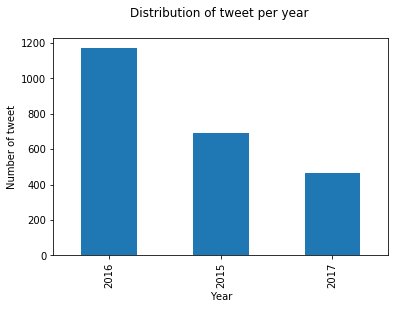

In [87]:
twitter_archive_master['year'].value_counts().plot(kind = "bar")
plt.xlabel('Year')
plt.ylabel('Number of tweet')
plt.title('Distribution of tweet per year \n')
plt.savefig("Tweet count by year.jpg")
plt.show()

>> from the archive tweet data, WeRateDogs the highest number of tweets in 2016

### Insights:
2.

In [93]:
# tweet by months distibution
twitter_archive_master['month'].value_counts()

Dec    456
Nov    389
Jan    287
Feb    210
Mar    200
Jul    158
Jun    152
Apr    116
May    113
Oct     88
Sep     81
Aug     73
Name: month, dtype: int64

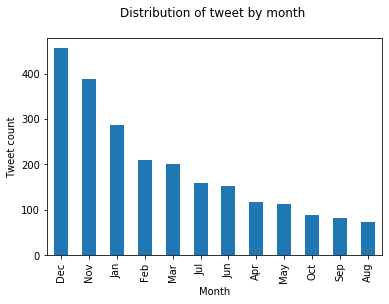

In [94]:
twitter_archive_master['month'].value_counts().plot(kind = "bar")
plt.xlabel('Month')
plt.ylabel('Tweet count')
plt.title('Distribution of tweet by month \n')
plt.savefig("tweet dist by month.jpg")
plt.show()

>> from the archive, more tweets are recorded from weratedogs in december.

### Insights:
3.

In [95]:
#what is the tweet time distrubution like and what are the effect.
twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,year
count,2.323000e+03,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000
mean,7.417641e+17,13.143780,10.474387,2473.625054,7055.228153,2015.903142
std,6.818649e+16,46.200738,6.788081,4193.024115,10974.361258,0.697975
min,6.660209e+17,0.000000,10.000000,1.000000,0.000000,2015.000000
25%,6.780222e+17,10.000000,10.000000,495.500000,1221.500000,2015.000000
50%,7.178418e+17,11.000000,10.000000,1149.000000,3053.000000,2016.000000
75%,7.986547e+17,12.000000,10.000000,2865.500000,8614.000000,2016.000000
max,8.924206e+17,1776.000000,170.000000,70842.000000,145042.000000,2017.000000


In [96]:
# years with higher retweet
above_avg_retweet_count = twitter_archive_master.query('retweet_count >= 2475.601892')

In [97]:
# distribution of retweets count by years for retweets above avaerage
above_avg_retweet_count.year.value_counts()

2016    318
2017    311
2015     38
Name: year, dtype: int64

>> Higher retweet are still recorded in 2016

In [98]:
# distribution by month
above_avg_retweet_count.month.value_counts()

Jul    77
Jun    71
Jan    70
Dec    67
Nov    58
Feb    55
Mar    55
Oct    54
May    50
Sep    44
Apr    40
Aug    26
Name: month, dtype: int64

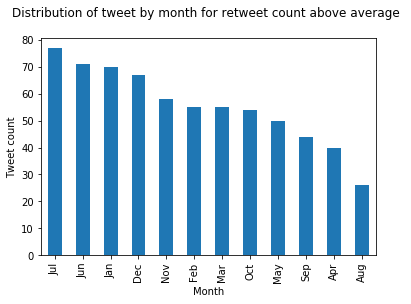

In [99]:
above_avg_retweet_count.month.value_counts().plot(kind = 'bar')
plt.xlabel('Month')
plt.ylabel('Tweet count')
plt.title('Distribution of tweet by month for retweet count above average \n')
plt.savefig("above average retweet count tweet dist by month.jpg")
plt.show()

>> for retweet above average more count were recorded in the month of July

### Insights:
4.

In [80]:
# Mean confidence level of the prediction model for prediction 1 , 2, 3
tweet_image_prediction.describe()

,tweet_id,img_num,prediction1_confidence(%),prediction2_confidence(%),prediction3_confidence(%)
count,2.075000e+03,2075.000000,2075.000000,2075.000000,2.075000e+03
mean,7.384514e+17,1.203855,59.454826,13.458861,6.032417e+00
std,6.785203e+16,0.561875,27.117352,10.066574,5.090593e+00
min,6.660209e+17,1.000000,4.433340,0.000001,1.740170e-08
25%,6.764835e+17,1.000000,36.441200,5.388625,1.622240e+00
50%,7.119988e+17,1.000000,58.823000,11.818100,4.944380e+00
75%,7.932034e+17,1.000000,84.385500,19.556550,9.180755e+00
max,8.924206e+17,4.000000,100.000000,48.801400,2.734190e+01


 >>  The average prediction confidence for the model is `59.454826%` for `prediction 1`, `13.458861%` for `prediciton 2` and `6.032417%` for `prediciton 3`

### Insights:
5.

In [81]:
# correct and incorrect prediciton distribution
tweet_image_prediction.prediction1_dog_type.value_counts()

True     1532
False     543
Name: prediction1_dog_type, dtype: int64

In [82]:
tweet_image_prediction.prediction2_dog_type.value_counts()

True     1553
False     522
Name: prediction2_dog_type, dtype: int64

In [83]:
tweet_image_prediction.prediction3_dog_type.value_counts()

True     1499
False     576
Name: prediction3_dog_type, dtype: int64

>> predicition 2 had the highest number of correct predicition and the lowest number of wrong prediction 

### Visualization

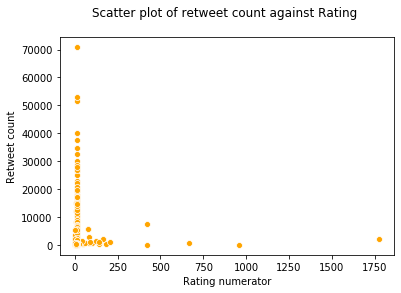

In [103]:
# how does the rating of a dog affects the retweet.
# plot retweet count against rating numerator
sns.scatterplot(data=twitter_archive_master, y = twitter_archive_master['retweet_count'], x = twitter_archive_master['rating_numerator'], color = 'orange')
plt.xlabel('Rating numerator')
plt.ylabel('Retweet count')
plt.title('Scatter plot of retweet count against Rating \n')
plt.savefig("retweet count against rating.jpg")
plt.show()

>> From the above chart, the numerator rating of a tweet does not have a correlation on the retweet count. So the rating may not impact the retweet count. 

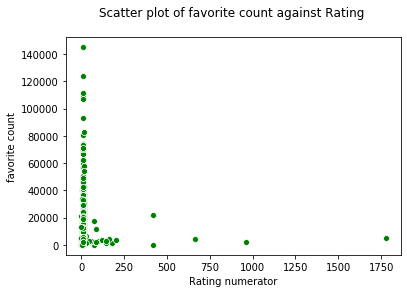

In [102]:
# how does the rating of a dog affects the favorite count.
# plot retweet count against rating numerator
sns.scatterplot(data=twitter_archive_master, y = twitter_archive_master['favorite_count'], x = twitter_archive_master['rating_numerator'], color = 'green')
plt.xlabel('Rating numerator')
plt.ylabel('favorite count')
plt.title('Scatter plot of favorite count against Rating \n')
plt.savefig("favorite count against rating.jpg")
plt.show()

>> From the above chart, the numerator rating of a tweet does not have a correlation on the favorite count. So the rating may not impact the favorite count. 